## **This *'ipynb'* file shows the Data Visualizations of the 2024 Andhra Pradesh Elections.**

In [17]:
# connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AP Elections 2024

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AP Elections 2024


In [18]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/AP Elections 2024/AP Elections data 2024.csv", encoding="windows-1252")

In [20]:
# total number of unique constituencies
unique_values = data['Assembly Constituency'].nunique()
print(unique_values)

# Assembly constituency names
sorted_unique_values = sorted(data['Assembly Constituency'].unique())
print(sorted_unique_values)

175
['Achanta', 'Addanki\xa0', 'Adoni\xa0', 'Allagadda\xa0', 'Alur', 'Amadalavalasa\xa0', 'Amalapuram\xa0', 'Anakapalle\xa0', 'Anantapur Urban', 'Anaparthy\xa0', 'Araku Valley', 'Atmakur', 'Avanigadda', 'Badvel', 'Banaganapalle', 'Bapatla', 'Bhimavaram\xa0', 'Bhimili\xa0', 'Bobbili\xa0', 'Chandragiri\xa0', 'Cheepurupalle\xa0', 'Chilakaluripet', 'Chintalapudi', 'Chirala', 'Chittoor', 'Chodavaram\xa0', 'Darsi', 'Denduluru', 'Dharmavaram', 'Dhone', 'Eluru', 'Etcherla\xa0', 'Gajapathinagaram\xa0', 'Gajuwaka\xa0', 'Gangadhara Nellore (SC)', 'Gannavaram', 'Gannavaram (sc)', 'Giddalur', 'Gopalapuram', 'Gudivada', 'Gudur', 'Guntakal', 'Guntur East', 'Guntur West', 'Gurajala', 'Hindupur', 'Ichchapuram', 'Jaggampeta', 'Jaggayyapeta', 'Jammalamadugu\xa0', 'Kadiri\xa0', 'Kaikalur', 'Kakinada City', 'Kakinada Rural', 'Kalyandurg', 'Kamalapuram', 'Kanigiri', 'Kavali', 'Kodumur (SC)', 'Kodur (SC)', 'Kondapi', 'Kothapeta', 'Kovur', 'Kovvu', 'Kuppam', 'Kurnool', 'Kurupam\xa0', 'Macherla\xa0', 'Machilip

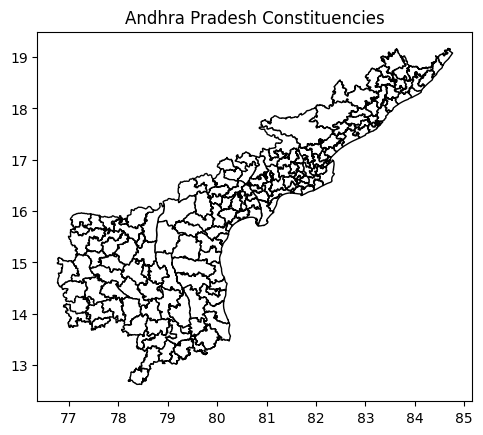

In [35]:
# Load the shapefile
shapefile_path = "/content/drive/MyDrive/AP Elections 2024/ANDHRA PRADESH_ASSEMBLY.geojson"
andhra_map = gpd.read_file(shapefile_path)
andhra_map.plot(edgecolor='black', color='white')
plt.title("Andhra Pradesh Constituencies")
plt.show()

In [22]:
# Load the shapefile
andhra_map = gpd.read_file(shapefile_path)

election_results = data

andhra_map = andhra_map.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
election_results = election_results.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-22-5a1043511ce3>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  election_results = election_results.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [23]:
election_results.head()

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,percentage of Votes,Assembly Constituency,Assembly Constituency Number,State
0,1,aluri chinnarao,bahujan samaj party,1536,7,1543,1.02,achanta,56,andhra pradesh
1,2,cherukuvada sri ranganadha raju,yuvajana sramika rythu congress party,58353,495,58848,39.09,achanta,56,andhra pradesh
2,3,nekkanti venkata satyanarayana (satish),indian national congress,1859,13,1872,1.24,achanta,56,andhra pradesh
3,4,satyanarayana pithani,telugu desam,84429,973,85402,56.73,achanta,56,andhra pradesh
4,5,allada surya bhaskara rao,jaathia chethi vruthula ikya vedika party,275,0,275,0.18,achanta,56,andhra pradesh


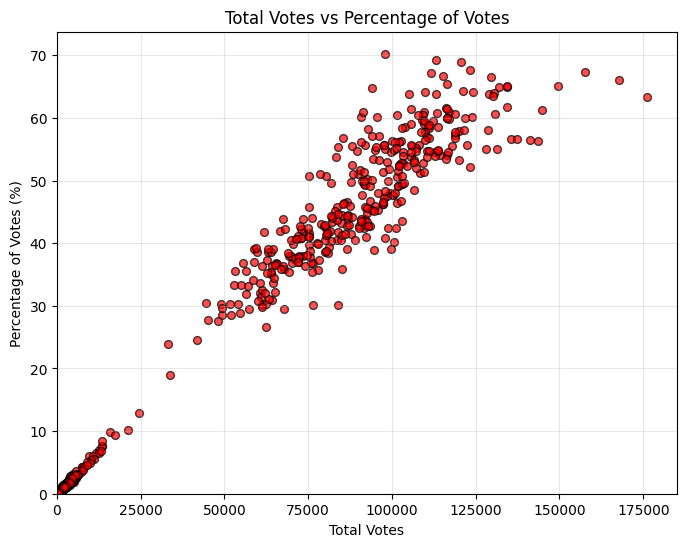

In [24]:
# scatter plot showing Total Votes polled vs the percentage of votes
plt.figure(figsize=(8, 6))
plt.scatter(data['Total Votes'], data['percentage  of Votes'], s=32, alpha=0.7, c='red', edgecolor='k')
plt.title('Total Votes vs Percentage of Votes')
plt.xlabel('Total Votes')
plt.ylabel('Percentage of Votes (%)')
plt.grid(alpha=0.3)
plt.xlim(0)
plt.ylim(0)
plt.show()


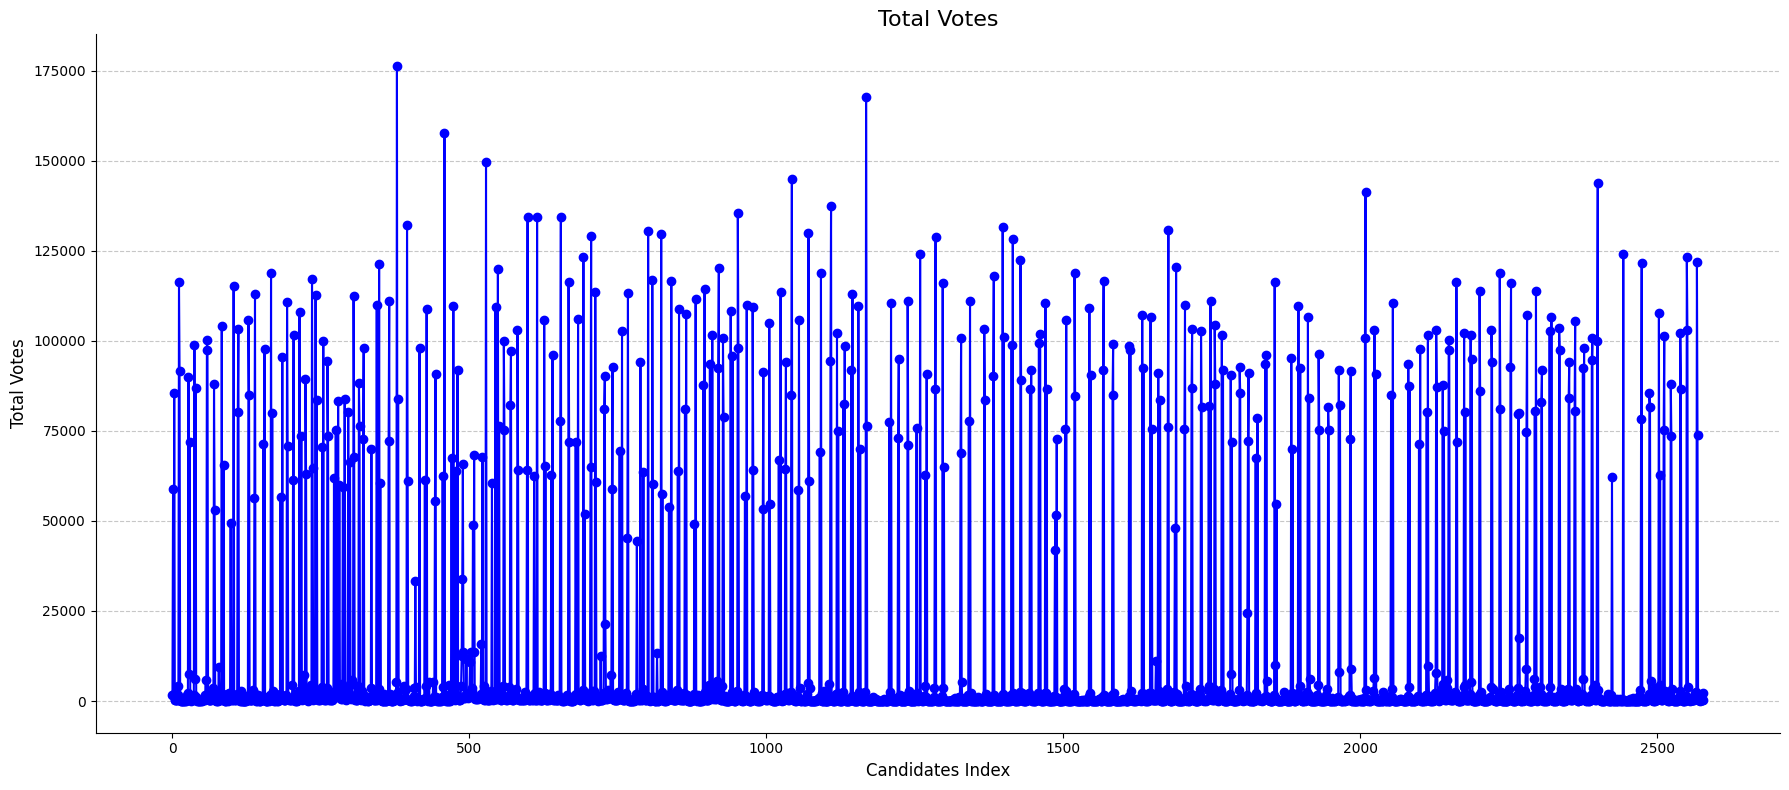

In [36]:
# Improved line plot for Total Votes
plt.figure(figsize=(18, 8))
election_results['Total Votes'].plot(
    kind='line',
    color='blue',
    linestyle='-',
    marker='o',
    markersize=6,
    title='Total Votes by Index'
)

plt.title('Total Votes', fontsize=16)
plt.xlabel('Candidates Index', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

<ipython-input-37-74980bd793df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Assembly Constituency', y='percentage  of Votes', data=data, palette='Set1', linewidth=1.5)


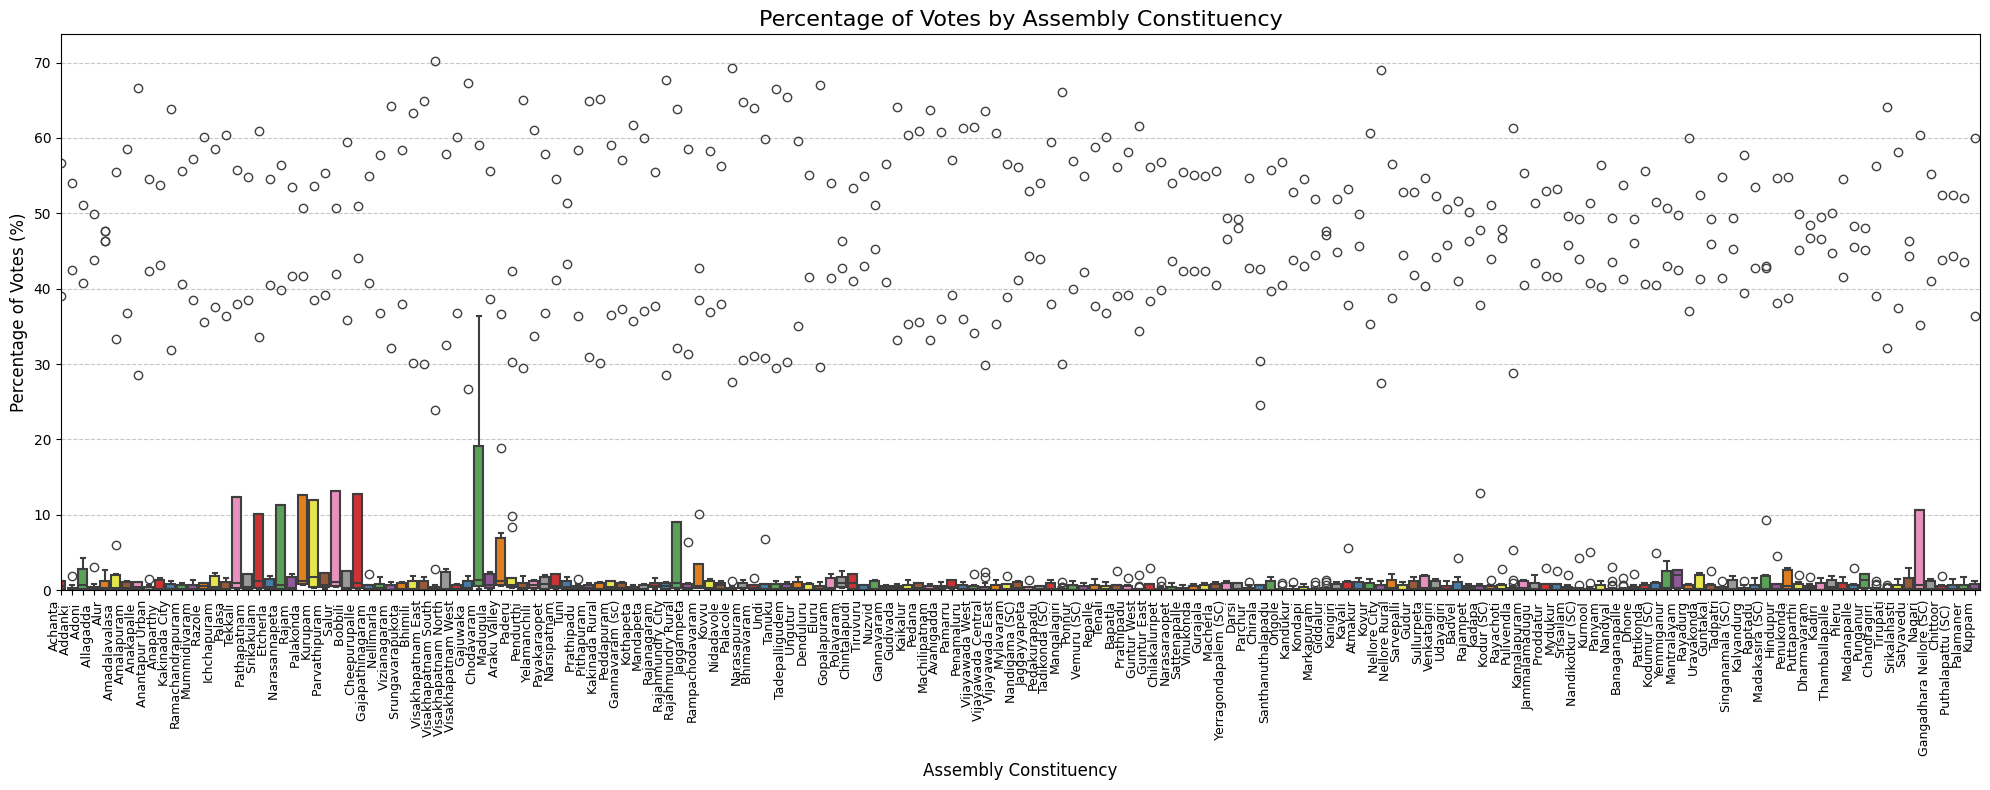

In [37]:
# Improved box plot for Percentage of Votes by Assembly Constituency
plt.figure(figsize=(20, 8))
sns.boxplot(x='Assembly Constituency', y='percentage  of Votes', data=data, palette='Set1', linewidth=1.5)

plt.title('Percentage of Votes by Assembly Constituency', fontsize=16)
plt.xlabel('Assembly Constituency', fontsize=12)
plt.ylabel('Percentage of Votes (%)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.show()

<ipython-input-38-c3d5b50e5f86>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


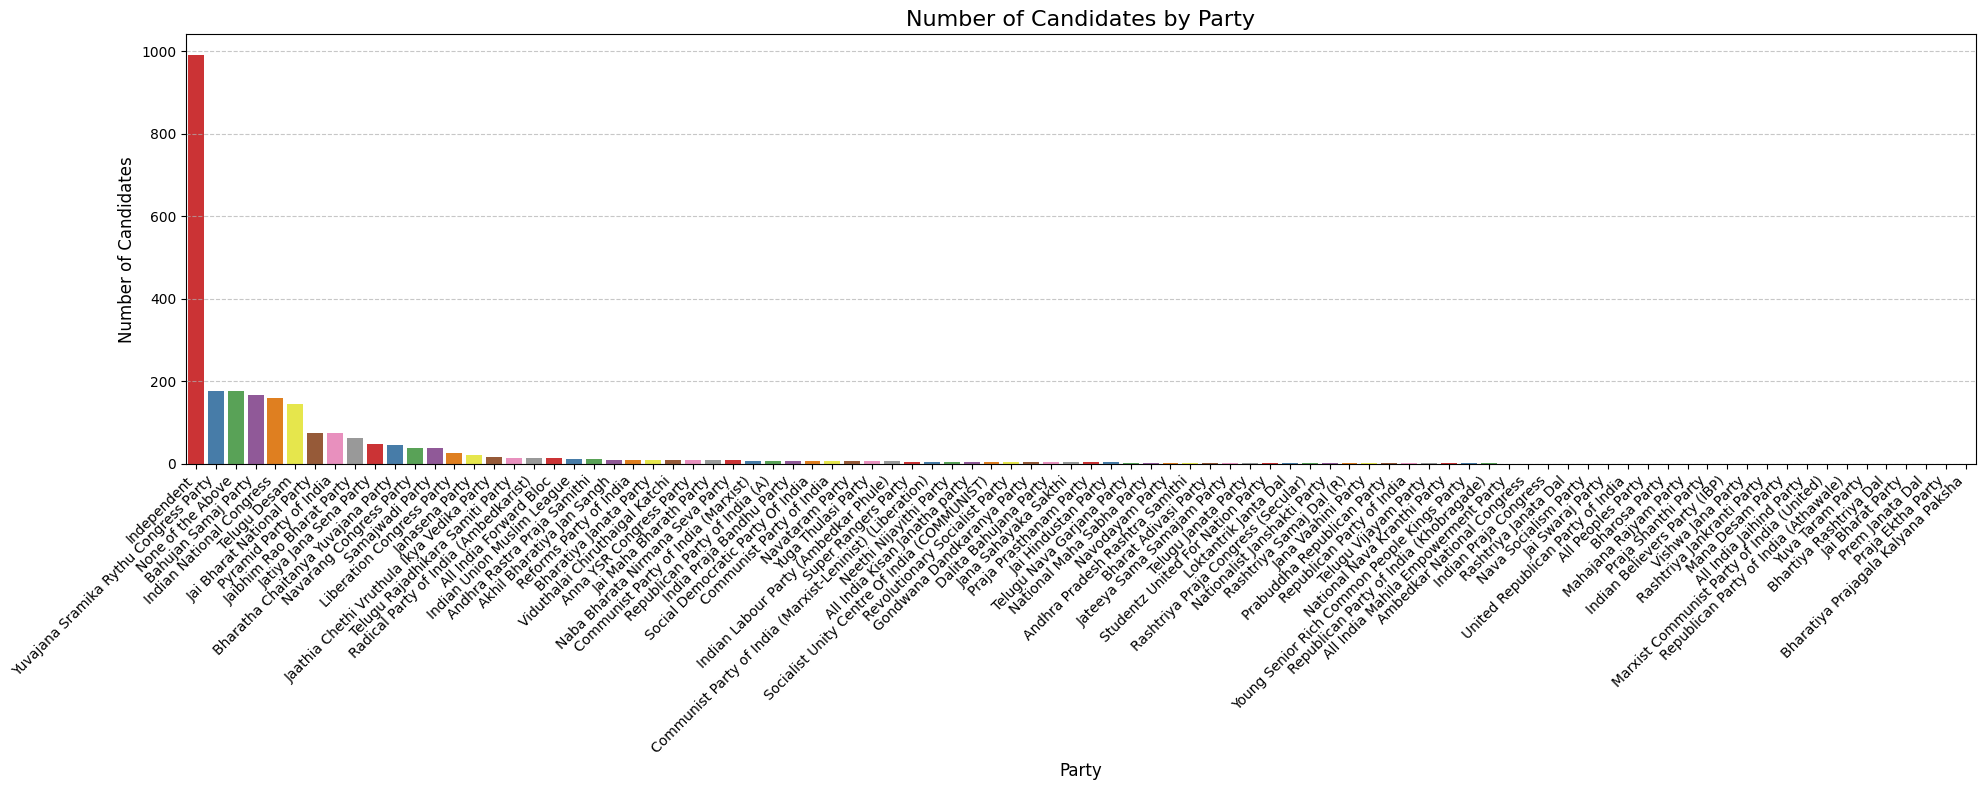

In [38]:
# Bar graph showing the number of candidates by party
candidates_by_party = election_results['Party'].value_counts()
plt.figure(figsize=(20, 8))
sns.barplot(
    x=candidates_by_party.index,
    y=candidates_by_party.values,
    palette='Set1'
)

plt.title('Number of Candidates by Party', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

<ipython-input-40-16ba4b1077b5>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['Total Votes'].idxmax()])


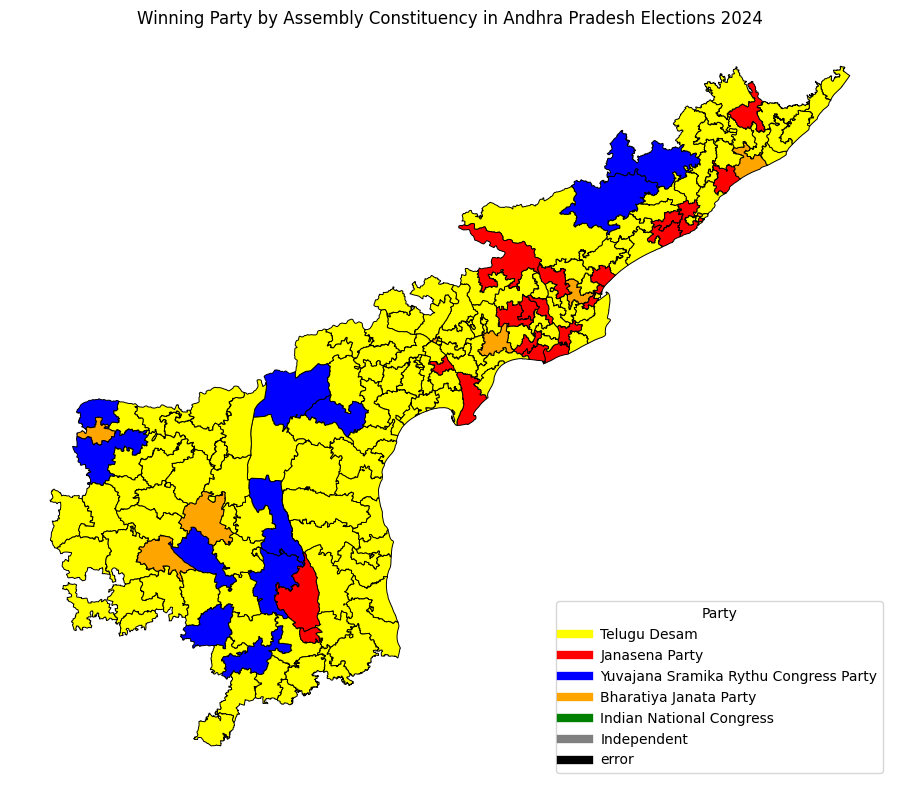

In [40]:
# Load election results data
data = pd.read_csv("/content/drive/MyDrive/AP Elections 2024/AP Elections data 2024.csv", encoding="windows-1252")
election_results = data

# Load the GeoJSON file
geojson_file = '/content/drive/MyDrive/AP Elections 2024/ANDHRA PRADESH_ASSEMBLY.geojson'
andhra_map = gpd.read_file(geojson_file)

# Ensure column types match for merging
election_results['Assembly Constituency Number '] = election_results['Assembly Constituency Number '].astype(str)
andhra_map['objectid'] = andhra_map['objectid'].astype(str)

# Compute the winning party for each constituency
winning_party = (
    election_results
    .groupby('Assembly Constituency Number ')
    .apply(lambda x: x.loc[x['Total Votes'].idxmax()])
    .reset_index(drop=True)
)

# Merge the GeoJSON data with the winning party data
merged_data = andhra_map.merge(
    winning_party[['Assembly Constituency Number ', 'Party']],
    left_on='objectid',
    right_on='Assembly Constituency Number ',
    how='left'
)

# Map party names to colors
party_colors = {
    'Telugu Desam': 'yellow',
    'Janasena Party': 'red',
    'Yuvajana Sramika Rythu Congress Party': 'blue',
    'Bharatiya Janata Party': 'orange',
    'Indian National Congress': 'green',
    'Independent': 'gray',
    'error': 'black'
}

# Ensuring that all parties in the dataset have a color
merged_data['Party Color'] = merged_data['Party'].map(party_colors)
merged_data['Party Color'] = merged_data['Party Color'].fillna('black')
unique_colors = list(party_colors.values())
unique_parties = list(party_colors.keys())
custom_cmap = ListedColormap(unique_colors)

# Map of Andhra Pradesh which shows the winning party of each constituency
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(
    color=merged_data['Party Color'],
    edgecolor='black',
    linewidth=0.7,
    ax=ax
)

plt.title('Winning Party by Assembly Constituency in Andhra Pradesh Elections 2024')
handles = [plt.Line2D([0], [0], color=color, lw=6, label=party) for party, color in party_colors.items()]
plt.legend(handles=handles, title="Party", loc='lower right')
plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
# Finding the total number of seats won by each party
winners = data.loc[data.groupby("Assembly Constituency")["Total Votes"].idxmax(), "Party"]

party_wins = winners.value_counts()

total_seats = party_wins.sum()

print("Total constituencies won by each party:")
print(party_wins)
print("\nTotal number of constituencies (seats):", total_seats)

Total constituencies won by each party:
Party
Telugu Desam                             135
Janasena Party                            21
Yuvajana Sramika Rythu Congress Party     11
Bharatiya Janata Party                     8
Name: count, dtype: int64

Total number of constituencies (seats): 175


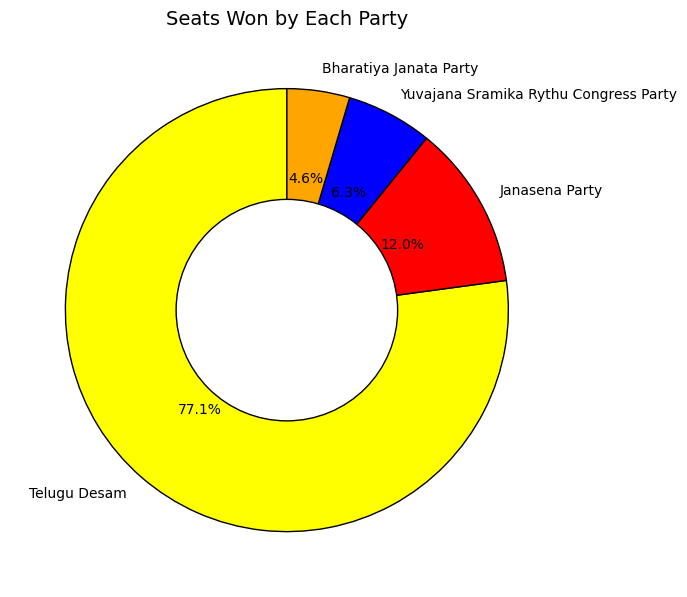

In [34]:
# Donut chart showing the percentage of seats won by each party
plt.figure(figsize=(7, 7))
colors = ['yellow', 'red', 'blue', 'orange']
party_wins.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    labels=party_wins.index,
    wedgeprops={'edgecolor': 'black'}
)

# donut effect
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor = 'black')
plt.gca().add_artist(centre_circle)
plt.title('Seats Won by Each Party', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()